
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

This is an example of classification problem in supervised learning.

In supervised learning, we teach the machine with labelled data. Both regression and classification are two types of it.
In Regression we are estimating the relationship among variables and make prediction about some outcome. But in a classification problem, the training dataset consists of data related to independent variables and response variable (label).
Binary classification problem has the target label with two classes and the task is to predict one of the classes. 
Inshort, classification is about predicting a label and regression is about predicting a quantity.

In this problem we are identifying students who may need early intervention before they fail or pass. so using classification method.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read student data
pd.set_option('display.max_columns', None)
std =pd.read_csv('student-data.csv')
std.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [3]:
std.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,no


In [4]:
std.isna().sum()   # checking missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

#### Remarks: Data consisting of 395 rows and 31 columns having no null values. (object datatype is 18 and int datatype 13)

### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [5]:
# Calculate number of students
n_students = len(std)

In [6]:
# Calculate number of features
n_features = len(std.columns)-1

In [7]:
# Calculate passing students
n_passed = std['passed'].value_counts()['yes']

In [8]:
# Calculate failing students
n_failed = std['passed'].value_counts()['no']

In [9]:
# Calculate graduation rate
grad_rate =  ((n_passed/n_students)*100)

In [10]:
# Print the results
print("The total number of students is :", n_students)
print("The total number of features for each student is: " , n_features)
print("The number of those students who passed: " , n_passed)
print("The number of those students who failed is: ", n_failed)
print("The graduation rate of the class: ", grad_rate,'%')

The total number of students is : 395
The total number of features for each student is:  30
The number of those students who passed:  265
The number of those students who failed is:  130
The graduation rate of the class:  67.08860759493672 %


### Preparing the Data

In [11]:
#preparing the data for modeling, training and testing.
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
std.groupby('passed')['sex'].value_counts()  # gender wise analysis of students passed.

passed  sex
no      F       75
        M       55
yes     F      133
        M      132
Name: sex, dtype: int64

### checking for outliers

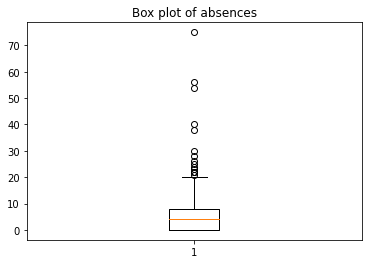

In [13]:
# plotting boxplot to find outliers in 'absences' column.
plt.boxplot(std['absences'])
plt.title('Box plot of absences')
plt.show()

#### Remarks: there are many outliers in this column that we need to remove. we are using inter quartile range for this.

In [14]:
Q1=np.percentile(std['absences'],25,interpolation='midpoint')
Q2=np.percentile(std['absences'],50,interpolation='midpoint')
Q3=np.percentile(std['absences'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 0.0
The Q2 value: 4.0
The Q3 value: 8.0
The values below -12.0 and above 20.0 are outliers.


In [15]:
outlier=[]
for x in std["absences"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in SW feature')
print('Outliers are:',outlier)

There are 15 outliers in SW feature
Outliers are: [25, 54, 26, 56, 24, 28, 22, 21, 75, 22, 30, 38, 22, 40, 23]


In [16]:
ind1,ind2= std['absences'] > up_lim,std['absences'] < low_lim
i1=std.loc[ind1].index
i2=std.loc[ind2].index
print('The index values of the outliers which are above upper limit:',i1,'\n')
print('The Index values of the outliers which are below lower limit:',i2)

The index values of the outliers which are above upper limit: Int64Index([40, 74, 103, 183, 198, 205, 216, 260, 276, 277, 280, 307, 313, 315,
            320],
           dtype='int64') 

The Index values of the outliers which are below lower limit: Int64Index([], dtype='int64')


In [17]:
# dropping outliers
std.drop([40, 74, 103, 183, 198, 205, 216, 260, 276, 277, 280, 307, 313, 315,320],inplace=True)

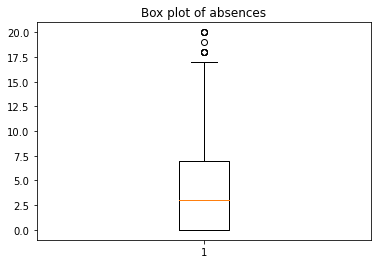

In [18]:
plt.boxplot(std['absences'])
plt.title('Box plot of absences')
plt.show()

Now most of the outliers are removed. similarly checking other columns.

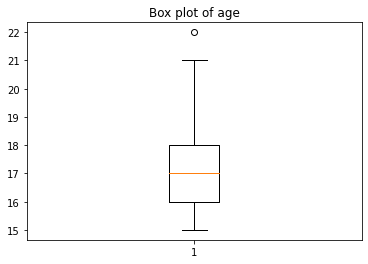

In [19]:
plt.boxplot(std['age'])
plt.title('Box plot of age')
plt.show()

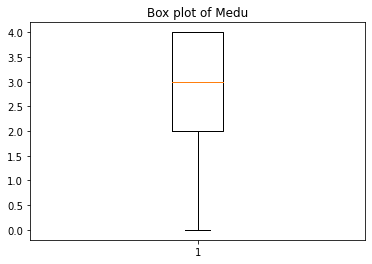

In [20]:
plt.boxplot(std['Medu'])
plt.title('Box plot of Medu')
plt.show()       # no outliers here

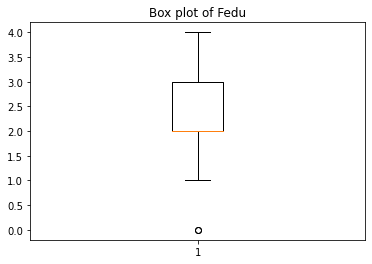

In [21]:
plt.boxplot(std['Fedu'])
plt.title('Box plot of Fedu')
plt.show()

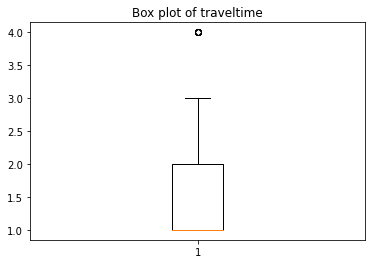

In [22]:
plt.boxplot(std['traveltime'])
plt.title('Box plot of traveltime')
plt.show()

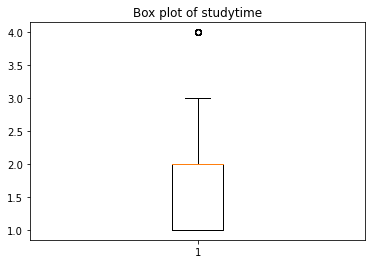

In [23]:
plt.boxplot(std['studytime'])
plt.title('Box plot of studytime')
plt.show()

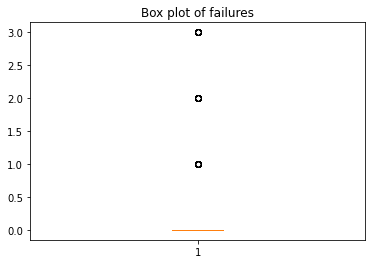

In [24]:
plt.boxplot(std['failures'])
plt.title('Box plot of failures')
plt.show()

In [25]:
Q1=np.percentile(std['failures'],25,interpolation='midpoint')
Q2=np.percentile(std['failures'],50,interpolation='midpoint')
Q3=np.percentile(std['failures'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 0.0
The Q2 value: 0.0
The Q3 value: 0.0
The values below 0.0 and above 0.0 are outliers.


In [26]:
outlier=[]
for x in std["failures"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in SW feature')
print('Outliers are:',outlier)

There are 76 outliers in SW feature
Outliers are: [3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 1, 2, 3, 3, 1, 2, 2, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3]


In [27]:
ind1,ind2= std['failures'] > up_lim,std['failures'] < low_lim
i1=std.loc[ind1].index
i2=std.loc[ind2].index
print('The index values of the outliers which are above upper limit:',i1,'\n')
print('The Index values of the outliers which are below lower limit:',i2)

The index values of the outliers which are above upper limit: Int64Index([  2,  18,  25,  44,  49,  52,  72,  78,  85,  88,  95, 111, 112,
            118, 127, 128, 130, 137, 138, 141, 144, 146, 149, 150, 151, 152,
            153, 157, 159, 160, 161, 162, 164, 165, 170, 173, 206, 213, 217,
            221, 225, 239, 247, 248, 250, 252, 255, 270, 278, 281, 292, 304,
            305, 308, 309, 310, 312, 314, 336, 340, 341, 343, 349, 350, 352,
            353, 361, 367, 370, 376, 383, 384, 387, 389, 390, 392],
           dtype='int64') 

The Index values of the outliers which are below lower limit: Int64Index([], dtype='int64')


In [28]:
std.drop([2,  18,  25,  44,  49,  52,  72,  78,  85,  88,  95, 111, 112,
            118, 127, 128, 130, 137, 138, 141, 144, 146, 149, 150, 151, 152,
            153, 157, 159, 160, 161, 162, 164, 165, 170, 173, 206, 213, 217,
            221, 225, 239, 247, 248, 250, 252, 255, 270, 278, 281, 292, 304,
            305, 308, 309, 310, 312, 314, 336, 340, 341, 343, 349, 350, 352,
            353, 361, 367, 370, 376, 383, 384, 387, 389, 390, 392],inplace=True)

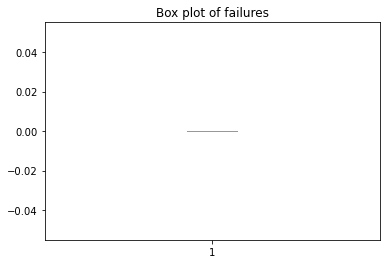

In [29]:
plt.boxplot(std['failures'])
plt.title('Box plot of failures')
plt.show()                   # removed outliers

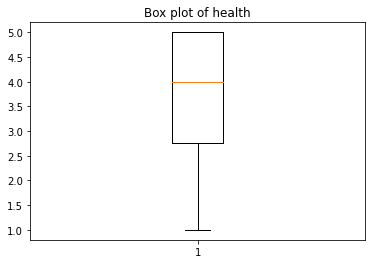

In [30]:
plt.boxplot(std['health'])
plt.title('Box plot of health')
plt.show()      # no outliers here.

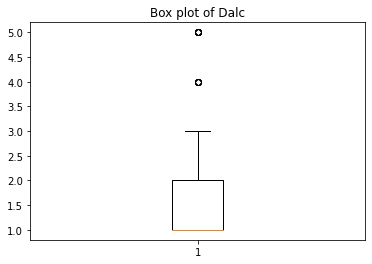

In [31]:
plt.boxplot(std['Dalc'])
plt.title('Box plot of Dalc')
plt.show()

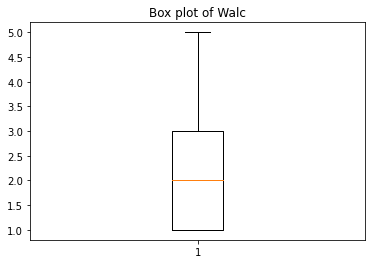

In [32]:
plt.boxplot(std['Walc'])
plt.title('Box plot of Walc')
plt.show()                       # no outliers

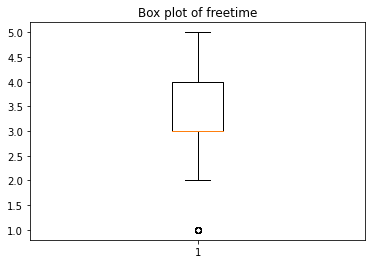

In [33]:
plt.boxplot(std['freetime'])
plt.title('Box plot of freetime')
plt.show()

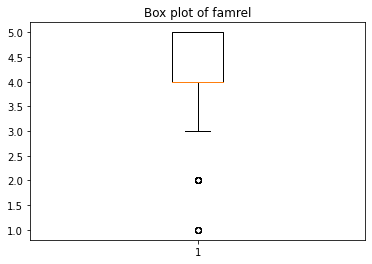

In [34]:
plt.boxplot(std['famrel'])
plt.title('Box plot of famrel')
plt.show()

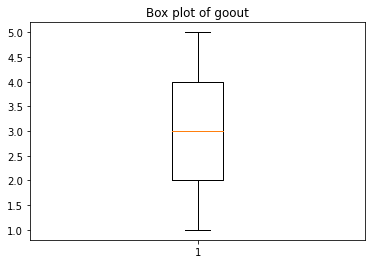

In [35]:
plt.boxplot(std['goout'])
plt.title('Box plot of goout')
plt.show()

### Question - 4 Identify feature and target columns

In [36]:
# displaying columns present in the dataset
std.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

#### From the data it is clear that the column 'passed' which is a binary variable(yes/no) is our target.

In [37]:
# Extract feature columns
feature_col= std.drop(['passed'],axis=1)
feature_col.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10


#### Note:  There are many categorical data in this feature columns.

In [38]:
# Extract target column 'passed'
target_col= pd.DataFrame(std['passed']).head(5)
target_col

,passed
0,no
1,no
3,yes
4,yes
5,yes


#### Note: Target column is binary (yes/no) categorical data.

In [39]:
# Separating the data into feature data and target data (X and y, respectively)
X= std.drop(['passed'],axis=1)
y= std['passed']

In [40]:
X.head()   #feature data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10


In [41]:
y.head()      #target data

0     no
1     no
3    yes
4    yes
5    yes
Name: passed, dtype: object

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [42]:
# label encoding column 'passed'.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['sex'] = le.fit_transform(std['sex'])
X['schoolsup'] = le.fit_transform(std['schoolsup'])
X['famsup'] = le.fit_transform(std['famsup'])
X['paid'] = le.fit_transform(std['paid'])
X['famsup'] = le.fit_transform(std['famsup'])
X['activities'] = le.fit_transform(std['activities'])
X['nursery'] = le.fit_transform(std['nursery'])
X['higher'] = le.fit_transform(std['higher'])
X['internet'] = le.fit_transform(std['internet'])
X['romantic'] = le.fit_transform(std['romantic'])
X['famsup'] = le.fit_transform(std['famsup'])
X['school'] = le.fit_transform(std['school'])
X['address'] = le.fit_transform(std['address'])
X['famsize'] = le.fit_transform(std['famsize'])
X['Pstatus'] = le.fit_transform(std['Pstatus'])
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4
3,0,0,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4
5,0,1,16,1,1,1,4,3,services,other,reputation,mother,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1,0,18,0,0,1,4,4,teacher,at_home,reputation,mother,3,1,0,0,1,1,1,1,1,1,1,4,4,3,2,2,5,7
388,1,0,18,1,1,1,3,1,teacher,services,course,mother,1,2,0,0,1,1,0,1,1,1,0,4,3,4,1,1,1,0
391,1,1,17,1,1,1,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3
393,1,1,18,0,1,1,3,2,services,other,course,mother,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0


#### Now the 'passed' column has become binary, where 1 represents 'yes' and 0 represents 'no'.

In [43]:
X = pd.get_dummies(X)   #OneHotEncoding the feature columns.
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,0,1,16,1,1,1,4,3,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1,0,18,0,0,1,4,4,3,1,0,0,1,1,1,1,1,1,1,4,4,3,2,2,5,7,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
388,1,0,18,1,1,1,3,1,1,2,0,0,1,1,0,1,1,1,0,4,3,4,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
391,1,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
393,1,1,18,0,1,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [44]:
X.shape

(304, 43)

In [45]:
y.shape

(304,)

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [46]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [47]:
# Show the results of the split
print(X.shape)

(304, 43)


In [48]:
print(y.shape)

(304,)


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [49]:
#explaination


In [50]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


### Model-1 : Logistic Regression

In [51]:
# fit model-1  on traning data 
loR_model = LogisticRegression()
loR_model.fit(X_train,y_train)
# predict on the test data 
y_pred = loR_model.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [53]:
# calculate the accuracy score
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 0.7105263157894737
Precision score is: 0.5296803652968036
Recall score is: 0.5056277056277056
f1 score is: 0.4557291666666667


In [54]:
#comparing y_test and y_pred
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 1, 20],
       [ 2, 53]], dtype=int64)

### Model-2 : K-Neighbors Classifier

In [55]:

acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(X_train, y_train)      # fit the model-2 on traning data
    y_pred = Classifier.predict(X_test)   # predict on the test data
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
    

In [56]:
acc_values                                    # measure the accuracy

[0.6842105263157895,
 0.6842105263157895,
 0.7368421052631579,
 0.6973684210526315,
 0.7631578947368421,
 0.75,
 0.7631578947368421,
 0.7631578947368421,
 0.7631578947368421,
 0.75,
 0.75,
 0.7368421052631579]

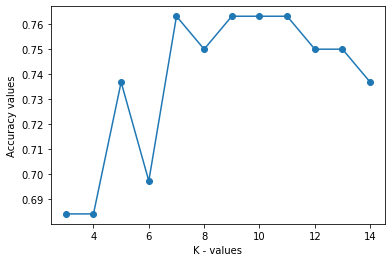

In [57]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K - values')                             # finding k values corresponding to maximum accuracy
plt.ylabel('Accuracy values')
plt.show() 

here we can see that the K values= 7,9,10,11 has maximum accuracy values so we can take any of these for prediction.

In [58]:
Classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

In [59]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 0.7631578947368421
Precision score is: 0.8767123287671232
Recall score is: 0.5714285714285714
f1 score is: 0.5546875


In [60]:
confusion_matrix(y_test,y_pred)

array([[ 3, 18],
       [ 0, 55]], dtype=int64)

### Model-3 : SVM Linear

In [61]:

svm_linear = SVC(kernel ='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

print('Accuracy on linear svm is: ', accuracy_score(y_test, y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy on linear svm is:  0.7368421052631579
Precision score is: 0.8666666666666667
Recall score is: 0.5238095238095238
f1 score is: 0.4685314685314685


In [62]:
confusion_matrix(y_test,y_pred)

array([[ 1, 20],
       [ 0, 55]], dtype=int64)

### Model -  : Random Forest classifier

In [63]:

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [64]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average='micro'))
print("Recall is: ", recall_score(y_test,y_pred, average='micro'))
print("f1 score is: ", f1_score(y_test,y_pred, average='micro'))

Accuracy is:  0.7236842105263158
Precision is:  0.7236842105263158
Recall is:  0.7236842105263158
f1 score is:  0.7236842105263158


In [65]:
confusion_matrix(y_test,y_pred)

array([[ 0, 21],
       [ 0, 55]], dtype=int64)

In [66]:
#Feature importance
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

absences             7.775736
goout                5.997292
age                  5.692207
health               5.306063
Fedu                 4.790478
Walc                 4.763817
freetime             4.461263
famrel               3.770376
Medu                 3.594310
studytime            3.480625
Dalc                 2.770831
romantic             2.539913
sex                  2.534438
paid                 2.449844
famsize              2.280207
traveltime           2.135645
reason_course        2.126367
Mjob_other           2.039039
schoolsup            2.037242
address              1.992447
guardian_other       1.743806
famsup               1.712527
activities           1.706845
Fjob_at_home         1.669451
reason_reputation    1.587780
internet             1.553317
Mjob_services        1.520178
nursery              1.516257
guardian_mother      1.477822
Fjob_other           1.408323
guardian_father      1.331842
reason_home          1.288247
Mjob_at_home         1.266690
Mjob_teach

## Results:

In [67]:
data = {'accuracy score':[0.71, 0.76, 0.72, 0.73],
       'misclassifications':[22,18,21,20]}
 
# Creating pandas DataFrame.
df = pd.DataFrame(data, index =['Logistic Regression',
                                'KNN',
                                'Random Forest',
                                'Linear SVM'])
 
# print the data
df

,accuracy score,misclassifications
Logistic Regression,0.71,22
KNN,0.76,18
Random Forest,0.72,21
Linear SVM,0.73,20


### Inference:  
### From above table, we can clearly see that the model KNN is the best model with an accuracy score of 0.76.

In [68]:
# Group-3 activity